<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


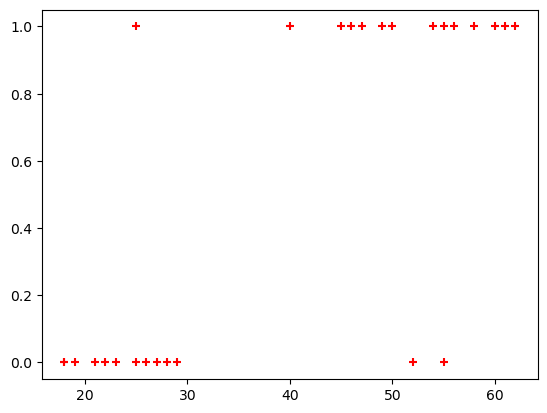

In [7]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
we will fit a line on the graph but for linear regression values are not bounded so we give that values to the sigmoid function

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.2, random_state=10)

In [10]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [14]:
X_test.shape

(6, 1)

In [15]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [16]:
y_predicted = model.predict(X_test)

In [17]:
print(y_predicted)

[1 1 0 0 0 0]


In [19]:
0.07149888 + 0.92850112

1.0

In [16]:
0.10786116+  0.89213884

1.0

In [18]:
model.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [19]:
model.score(X_test,y_test)

1.0

In [20]:
y_predicted

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


**model.coef_ indicates value of m in y=m*x + b equation**

In [20]:
model.coef_

array([[0.11277822]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [21]:
model.intercept_

array([-4.2028033])

**Lets defined sigmoid function now and do the math with hand**

In [22]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [23]:
sigmoid(0)

0.5

In [24]:
sigmoid(9)

0.9998766054240137

In [25]:
sigmoid(10000)

1.0

In [26]:
sigmoid(-90)

8.194012623990515e-40

In [33]:
def prediction_function(age):
    z = 0.11277822 * age - 4.2028033 
    print("Original val", z)
    y = sigmoid(z)
    return y

In [34]:
age = 60
prediction_function(age)

Original val 2.5638898999999995


0.9285011265193779

In [35]:
age = 35
prediction_function(age)

Original val -0.25556560000000017


0.4364540926806563

In [36]:
age = 55
prediction_function(age)

Original val 1.9999987999999993


0.8807969519855223

In [37]:
age = 40
prediction_function(age)

Original val 0.3083254999999996


0.5764764821440581

In [38]:
age = 0
prediction_function(age)

Original val -4.2028033


0.014733282986619637

In [39]:
# Get the order of classes
class_order = model.classes_
print("Class Order:", class_order)

Class Order: [0 1]


In [51]:
# Create a DataFrame with age values
ages = [44, 18, 12, 99, 86]
new_test = pd.DataFrame({'age': ages})

# Apply the prediction_function to each age value
new_test['Prediction'] = new_test['age'].apply(prediction_function)

# Print the DataFrame
print(new_test)

Original val 0.7594383799999997
Original val -2.1727953400000004
Original val -2.84946466
Original val 6.962240479999999
Original val 5.49612362
   age  Prediction
0   44    0.681232
1   18    0.102220
2   12    0.054709
3   99    0.999054
4   86    0.995914


In [49]:
labels = model.predict(new_test[['age']])

# Print the labels
print(labels)

[0 0 0 1 1]


In [50]:

# changing threshold and predicting 
print('prediction with threshold 0.9 :') 
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.9).astype(int) 
print(y_pred_new_threshold)


prediction with threshold 0.9 :
[1 0 0 0 0 0]


In [46]:
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.9).astype(int) 


Yes, the code you provided is correctly adjusting the threshold for classification based on predicted probabilities. In this code:

```python
y_pred_new_threshold = (model.predict_proba(X_test)[:, 1] >= 0.9).astype(int)
```

You are using a threshold of 0.9. This means that you are classifying a sample as 1 (positive class) if the predicted probability of it belonging to the positive class is greater than or equal to 0.9. If the probability is less than 0.9, it will be classified as 0 (negative class).

So, the resulting `y_pred_new_threshold` will contain binary predictions where the threshold is set to 0.9, and elements will be either 0 or 1 based on this threshold.

In [33]:
model.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])